# Basic Package Mangement

In [1]:
#install.packages("pacman") # Execute this once.
require(pacman)

Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"

### Clearing and unloading packages

In [123]:
# Run this block, when done coding or before starting coding.
p_unload(all)
detach("package:datasets", unload=TRUE)
rm(list=ls()) # removes all previous stored variables

The following packages have been unloaded:
readxl, mosaic, ggridges, mosaicData, ggformula, ggstance, Matrix, lattice, forcats, stringr, dplyr, purrr, readr, tidyr, tibble, ggplot2, tidyverse, pacman



### Loading packages

In [2]:
pacman::p_load(pacman, tidyverse, mosaic)

# Initializing the dataframe

In [3]:
library("readxl")
df <- read_excel("data/DeathsDK160321.xlsx")
df

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


In [5]:
df_no_sum <- df[-c(11), ]
df_no_sum

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


### Plotting and testing

In [118]:
# Compute confidence interval around mean using normal approximation
bootstrap_bernoulli <- function(data = df_no_sum, sims = 100000, agegroup) {
    n <- data[data$interval == agegroup, ]$infected # Estimated numbers of infected of a certain agegroup in Denmark.
    p_hat <- data[data$interval == agegroup, ]$tot_deaths / n # The estimated probability of dying with covid-19 in the specifik agegroup.
                          
    # Simulate number of infected of size tested, with probability of dying reapeat k times.
    sample <- replicate(sims, rbinom(1000, n, p_hat))
    # Computing the mean of the simulated observations.
    sample_means <- apply(sample, 2, mean)
    
    return(sample_means)
}

In [117]:
samples_mean = list()
for (i in 1:10) {
    samples_mean[[i]] <- bootstrap_bernoulli(agegroup = i)   
}

In [119]:
quantile(unlist(samples_mean[10]), c(0.025, 0.975))

2.5%   97.5% 
543.787 546.203

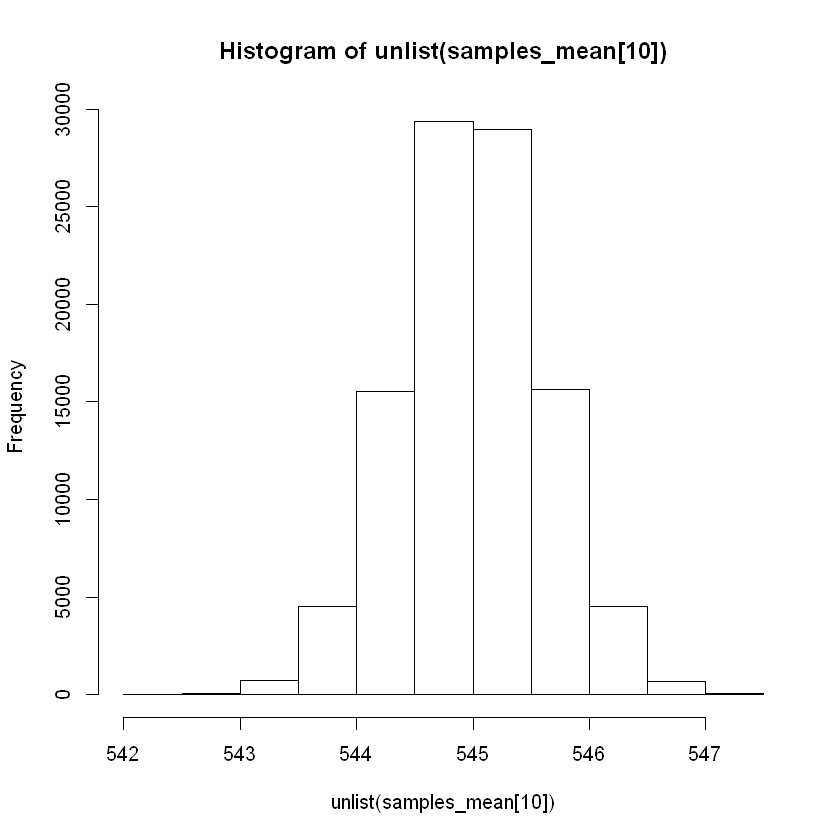

In [120]:
# Plot the result.
hist(unlist(samples_mean[10]))

### Hypotesetest

$H_0:$ Der er ingen signifikant forskel på dødeligheden i de forskellige aldersgrupper.